In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advance-house-price-predicitons/sample_submission.csv
/kaggle/input/advance-house-price-predicitons/data description.txt
/kaggle/input/advance-house-price-predicitons/formulatedtest.csv
/kaggle/input/advance-house-price-predicitons/train.csv
/kaggle/input/advance-house-price-predicitons/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To show all the features present in the dataset
pd.set_option('display.max_columns', None)
house_data = pd.read_csv('../input/advance-house-price-predicitons/train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**As seen from the list of columns, feature "Id" will not play any role in our datset, so we will drop that in the further stages**

In [6]:
#checking for features with null values
null_features = [c for c in house_data.columns if house_data[c].isnull().any()]
print(null_features)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


**The above mentioned features have null values in the dataset**

In [7]:
#checking the percentage of null values in the null_features
for feature in null_features:
    print(feature, ((house_data[feature].isnull().sum()/house_data.shape[0])*100 ,'% missing values'))

LotFrontage (17.73972602739726, '% missing values')
Alley (93.76712328767123, '% missing values')
MasVnrType (0.547945205479452, '% missing values')
MasVnrArea (0.547945205479452, '% missing values')
BsmtQual (2.5342465753424657, '% missing values')
BsmtCond (2.5342465753424657, '% missing values')
BsmtExposure (2.6027397260273974, '% missing values')
BsmtFinType1 (2.5342465753424657, '% missing values')
BsmtFinType2 (2.6027397260273974, '% missing values')
Electrical (0.0684931506849315, '% missing values')
FireplaceQu (47.26027397260274, '% missing values')
GarageType (5.5479452054794525, '% missing values')
GarageYrBlt (5.5479452054794525, '% missing values')
GarageFinish (5.5479452054794525, '% missing values')
GarageQual (5.5479452054794525, '% missing values')
GarageCond (5.5479452054794525, '% missing values')
PoolQC (99.52054794520548, '% missing values')
Fence (80.75342465753424, '% missing values')
MiscFeature (96.30136986301369, '% missing values')


**As we can see from the above result, features = "Alley", "PoolQC", "MiscFeature" have a lot of null values, above 90%.
Also the feature = "Fence" has around 80% of the null values.
So , we will drop these features right away.**

In [8]:
features_to_drop = ['Id', 'Alley','PoolQC', 'Fence', 'MiscFeature']
reduced_data = house_data.drop(features_to_drop, axis = 1)
reduced_data.shape

(1460, 76)

In [9]:
#now checking the features with null values and have datatype of int or float
null_values_int_float_features = [c for c in reduced_data.columns
                                 if reduced_data[c].isnull().any() and reduced_data[c].dtype != 'object']

print(null_values_int_float_features)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [10]:
#checking the range of values for these null_values_int_float_features and 
#then we will try to fill these values

reduced_data[null_values_int_float_features].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


**We need to fill these values with either mean, median or mode of the respective features.
To select the strategy we will plot some box plots to check the outliers, as mean will be effected by outliers but the median and mode will remain the same**

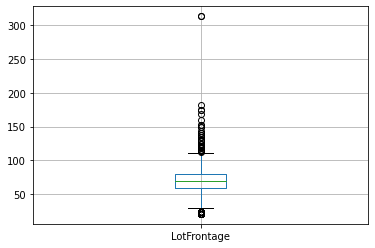

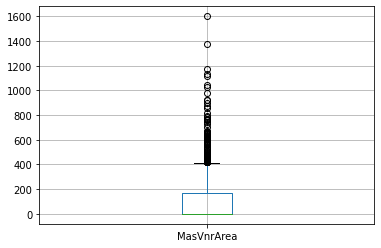

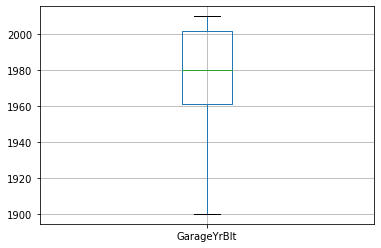

In [11]:
for c in null_values_int_float_features:
    reduced_data.boxplot(column = c)
    plt.title = c
    plt.show()

**As we can observe above, 'LotFrontage', 'MasVnrArea' have a lot of outliers, so we need to use the median strategy to fill the null values.
For GarageYrBlt, we can use either mean or median as it does not contain any outliers.**

In [12]:
#checking the original values before imputing
reduced_data[null_values_int_float_features].head(25)

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
5,85.0,0.0,1993.0
6,75.0,186.0,2004.0
7,NaN,240.0,1973.0
8,51.0,0.0,1931.0
9,50.0,0.0,1939.0


In [13]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')

for c in null_values_int_float_features:
    reduced_data[c] = median_imputer.fit_transform(reduced_data[[c]])

reduced_data[null_values_int_float_features].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

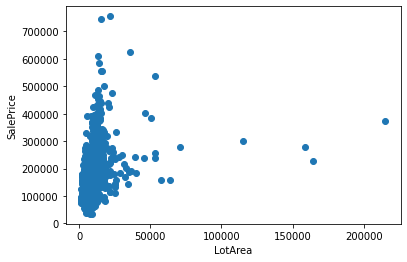

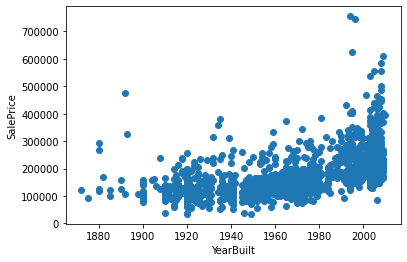

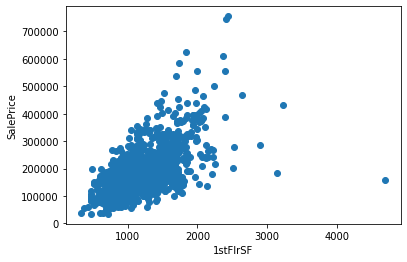

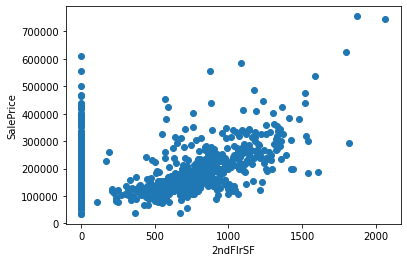

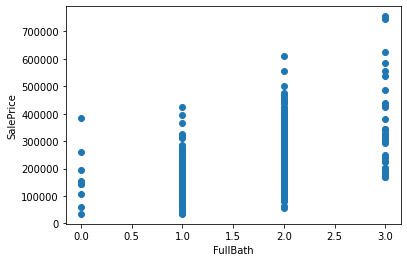

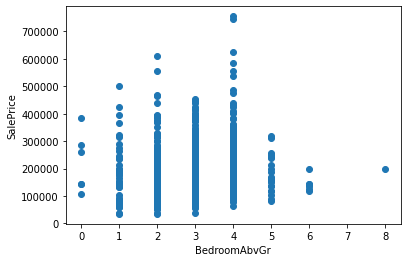

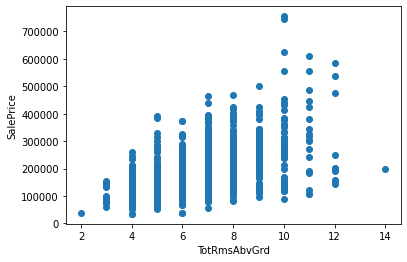

In [14]:
plot_features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

for c in plot_features:
    plt.scatter(reduced_data[c],reduced_data.SalePrice)
    plt.xlabel(c)
    plt.ylabel('SalePrice')
    plt.show()

In [15]:
discrete_features = ['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [16]:
#checking the categorical type features
object_type_features = [c for c in reduced_data.columns 
                       if reduced_data[c].dtype == 'object']
print(object_type_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [17]:
#Now checking the object features containing null values
null_object_type_features = [c for c in object_type_features
                            if reduced_data[c].isnull().any()]
print(null_object_type_features)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [18]:
reduced_data[null_object_type_features].head(25)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
5,None,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,Unf,TA,TA
6,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA
7,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,RFn,TA,TA
8,None,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,Unf,Fa,TA
9,None,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,RFn,Gd,TA


In [19]:
#checking the percentage of null values in the object type variables
for feature in null_object_type_features:
    print(feature, ((reduced_data[feature].isnull().sum()/reduced_data.shape[0])*100 ,'% missing values'))

MasVnrType (0.547945205479452, '% missing values')
BsmtQual (2.5342465753424657, '% missing values')
BsmtCond (2.5342465753424657, '% missing values')
BsmtExposure (2.6027397260273974, '% missing values')
BsmtFinType1 (2.5342465753424657, '% missing values')
BsmtFinType2 (2.6027397260273974, '% missing values')
Electrical (0.0684931506849315, '% missing values')
FireplaceQu (47.26027397260274, '% missing values')
GarageType (5.5479452054794525, '% missing values')
GarageFinish (5.5479452054794525, '% missing values')
GarageQual (5.5479452054794525, '% missing values')
GarageCond (5.5479452054794525, '% missing values')


In [20]:
for feature in null_object_type_features:
    print(feature, (reduced_data[feature].isnull().sum() ,' missing values'))

MasVnrType (8, ' missing values')
BsmtQual (37, ' missing values')
BsmtCond (37, ' missing values')
BsmtExposure (38, ' missing values')
BsmtFinType1 (37, ' missing values')
BsmtFinType2 (38, ' missing values')
Electrical (1, ' missing values')
FireplaceQu (690, ' missing values')
GarageType (81, ' missing values')
GarageFinish (81, ' missing values')
GarageQual (81, ' missing values')
GarageCond (81, ' missing values')


In [21]:
#checking the number of distinct values in each of the categorical variable
for c in null_object_type_features:
    print(f"{c} has {len(reduced_data[c].unique())} distinct values" )

MasVnrType has 5 distinct values
BsmtQual has 5 distinct values
BsmtCond has 5 distinct values
BsmtExposure has 5 distinct values
BsmtFinType1 has 7 distinct values
BsmtFinType2 has 7 distinct values
Electrical has 6 distinct values
FireplaceQu has 6 distinct values
GarageType has 7 distinct values
GarageFinish has 4 distinct values
GarageQual has 6 distinct values
GarageCond has 6 distinct values


In [22]:
#replacing the null values with the most frequent item in the where null values are less than 5%
temp_features = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']
print(temp_features)

mode_imputer = SimpleImputer(strategy = 'most_frequent')

for c in temp_features:
    reduced_data[c] = mode_imputer.fit_transform(reduced_data[[c]])

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']


In [23]:
#replace the remaining object type features with null values by a new label 'Missing' 

remaining_null_object_type_features = [c for c in object_type_features
                            if reduced_data[c].isnull().any()]
print(remaining_null_object_type_features)

for c in remaining_null_object_type_features:
    reduced_data[c].fillna('Missing', inplace = True)

['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [24]:
# Identifying the Numerical Variables
numerical_variables = [variable for variable in reduced_data.columns if reduced_data[variable].dtypes != 'O']
numerical_variables

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

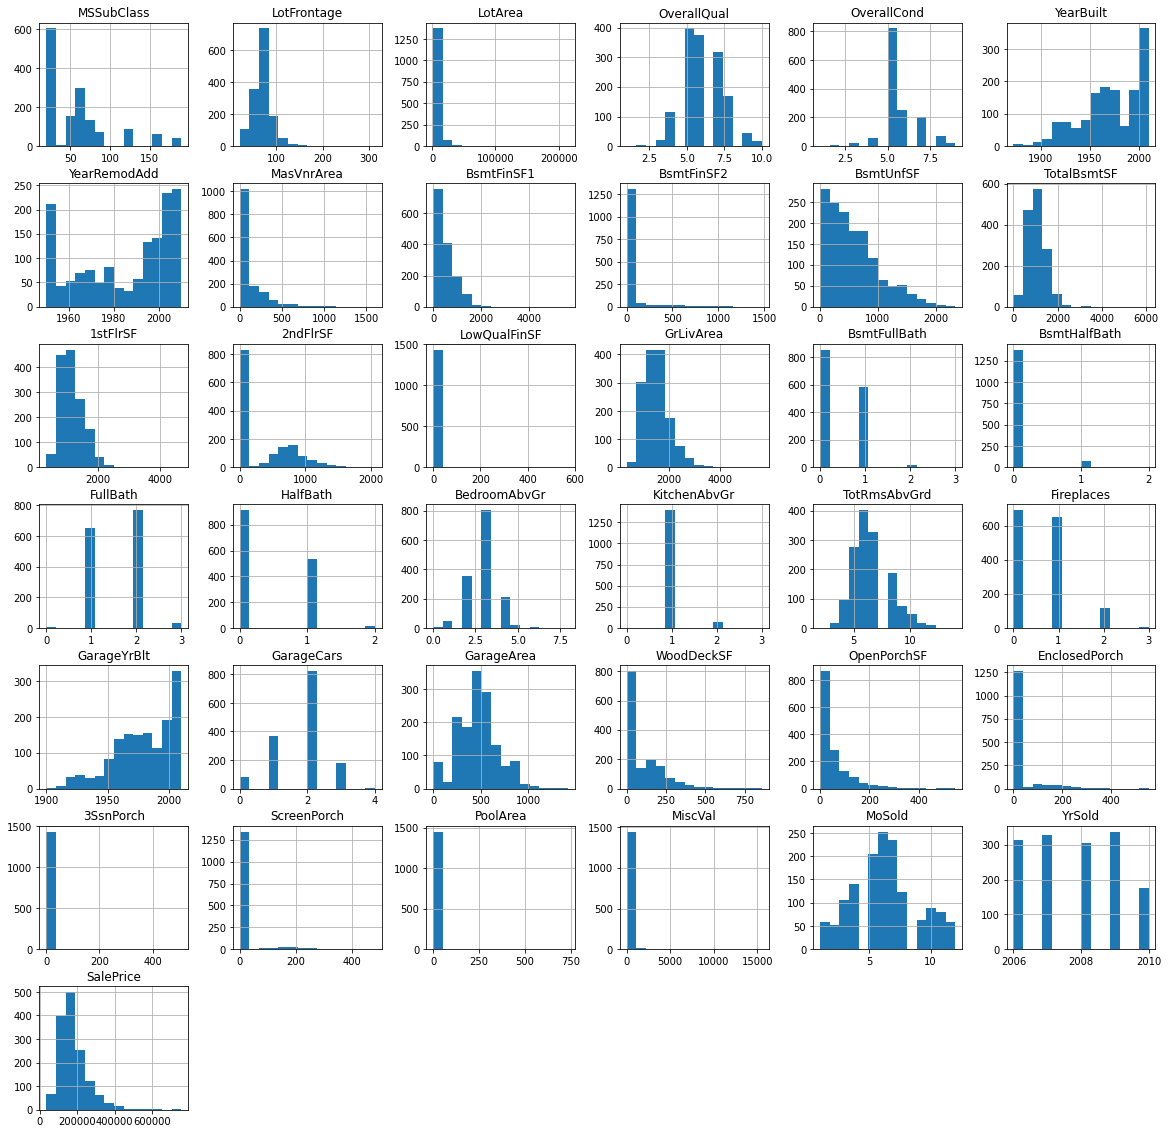

In [25]:
#checking the distribution of numerical features.
reduced_data.hist(bins=14, figsize=(20,20));

**From the above Histograms for the numerical attributes,we get to know that none of the features follow normal distribution.**

In [26]:
#Checking the correlation of each feature with sales price
reduced_data.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

**From the correlation table we can check the features which are highly correlated with our target variable 'SalePrice'**

<AxesSubplot:>

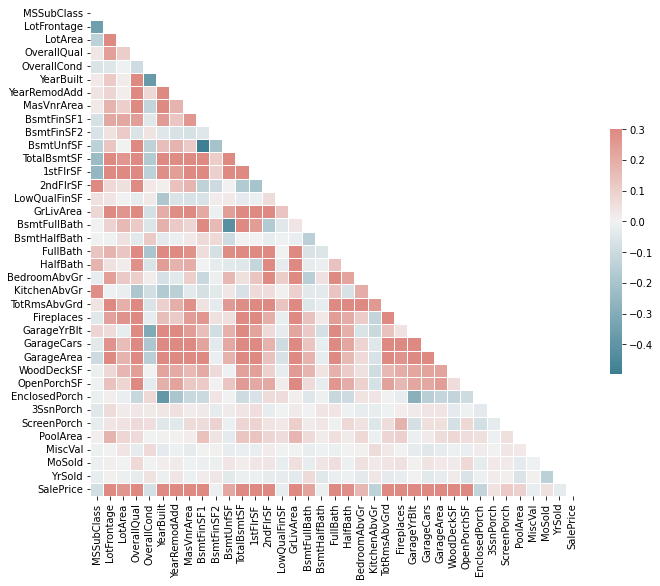

In [27]:
# plotting a correlaton heatmap
corr = reduced_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

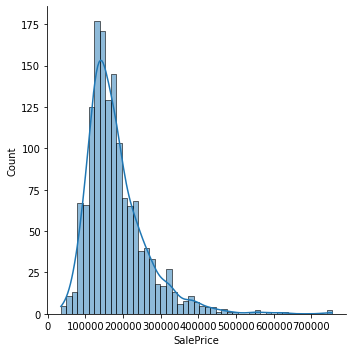

In [28]:
#checking the distribution of target
from scipy.stats import norm

sns.displot(data=reduced_data, x="SalePrice", kde='kde')

**From the above distribution we know that the target variable is also not following the Normal distribution curve**

In [29]:
# Get number of unique entries in each column with categorical data
object_cols = [col for col in reduced_data.columns if reduced_data[col].dtype == "object"]
object_nunique = list(map(lambda col: reduced_data[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('MasVnrType', 4),
 ('ExterQual', 4),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('KitchenQual', 4),
 ('GarageFinish', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Electrical', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('BsmtFinType1', 6),
 ('BsmtFinType2', 6),
 ('Heating', 6),
 ('FireplaceQu', 6),
 ('GarageQual', 6),
 ('GarageCond', 6),
 ('SaleCondition', 6),
 ('Functional', 7),
 ('GarageType', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

In [30]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if reduced_data[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Neighborhood', 'Exterior2nd', 'Exterior1st']


In [83]:
reduced_data.shape

(1460, 76)

In [31]:
reduced_data.drop(high_cardinality_cols, axis =1, inplace=True)
reduced_data.shape

(1460, 73)

In [32]:
# One hot encoding
categorical_values = [variable for variable in reduced_data.columns if reduced_data[variable].dtypes == 'O']
reduced_data = pd.get_dummies(reduced_data, columns = categorical_values)
reduced_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1

**The exploratory data analysis is completed with handling missing values, one-hot encoding for categorical values, null values and outlier analysis.**

**Since the target variable is a continuous one, let us apply different models to evaluate which gives the best accuracy and choose that model for our test dataset.**

# Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Splitting the dataset into train and test datasets.
train, test = train_test_split(reduced_data, train_size = 0.8, test_size = 0.2, random_state=1)
Y_train = train.pop('SalePrice')
X_train = train

print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", test.shape)


Shape of train data:  (1168, 224)
Shape of test data:  (292, 225)


# Linear Regressson Model

In [41]:
#Linear Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

#Applying the model to the test dataset
Y_test = test.pop('SalePrice')
X_test = test
Y_test_price = regressor.predict(X_test)

print("The score/accuracy for the test dataset: ",regressor.score(X_test, Y_test))
print(mean_absolute_error(Y_test, Y_test_price))
print("Snapshot of actual and predicted values as below:")
test_preds = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': Y_test_price.squeeze()})
print(test_preds)

The score/accuracy for the test dataset:  0.8661682766168017
19122.994919341312
Snapshot of actual and predicted values as below:
      Actual      Predicted
258   231500  214427.913713
267   179500  167216.478966
288   122000   97090.604355
649    84500   69869.564528
1233  142000  135749.711295
...      ...            ...
163   103200  109107.428797
47    249700  234463.458149
1432   64500   81917.352403
98     83000   81363.518362
409   339750  326792.132042

[292 rows x 2 columns]


In [42]:
# Checking the model on Training set to check the accuracy

# Y_train_price = regressor.predict(X_train)
# Checking the model score on train data set
# print("The score/accuracy for the train dataset: ",regressor.score(X_train, Y_train))
# print("Mean Squared Error for train dataset: ",mean_squared_error(Y_train, Y_train_price, squared=False))
# print("Mean Absolute Error for train dataset: ",mean_absolute_error(Y_train, Y_train_price))
# print("Snapshot of actual and predicted values in the train dataset:")
# predicted_train_model = pd.DataFrame({'Actual': Y_train.squeeze(), 'Predicted': Y_train_price.squeeze()})
# print(predicted_train_model)

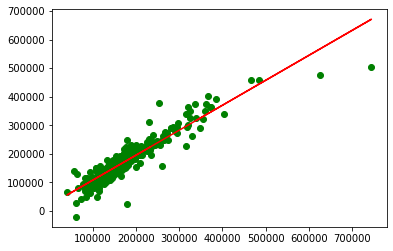

In [43]:
# Linear Regression Plot for the test dataset.
plt.scatter(Y_test, Y_test_price, color = 'green')

m, b = np.polyfit(Y_test, Y_test_price, 1)

#use red as color for regression line
plt.plot(Y_test, m*Y_test+b, color='red')

**As seen above, majority of the data points are much closer to the regression line than as outliers. Hence, for the linear regression model the score obtained is 87% and MAE is 19122.**

# Lasso Regression Model

In [44]:
# Lasso Regression
from sklearn.linear_model import Lasso

#Training the model
model_lasso = Lasso(alpha=0.01, max_iter= 40000,tol=1e-2)
X_train.values.reshape(-1,1)
Y_train.values.reshape(-1,1)
model_lasso.fit(X_train, Y_train)
pred_train_lasso= model_lasso.predict(X_train)
# print("Train MSE for Lasso Regression Model: ",np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
# print("Lasso Model Train Score: ",model_lasso.score(X_train, Y_train))

#Applying the model to the test dataset
X_test.values.reshape(-1,1)
Y_test.values.reshape(-1,1)
pred_test_lasso= model_lasso.predict(X_test)
print("Lasso Regression Model Score for test dataset: ",model_lasso.score(X_test, Y_test))
print('Mean Absolute Error: ',mean_absolute_error(Y_test, pred_test_lasso))

lasso_preds_df = pd.DataFrame({'Actual': Y_train.squeeze(), 'Predicted': pred_train_lasso.squeeze()})
lasso_preds_df
print(X_train.shape)
print(Y_train.shape)

Lasso Regression Model Score for test dataset:  0.8753226494178498
Mean Absolute Error:  18834.56147636257
(1168, 224)
(1168,)


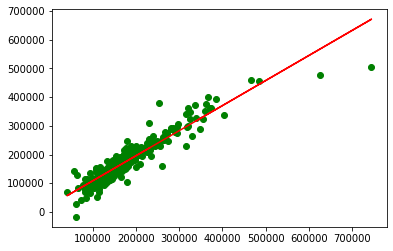

In [45]:
# Lasso Regression Plot for the test dataset.
plt.scatter(Y_test, pred_test_lasso, color = 'green')

m, b = np.polyfit(Y_test, pred_test_lasso, 1)

#use red as color for regression line
plt.plot(Y_test, m*Y_test+b, color='red')

**As seen above, majority of the data points are much closer to the regression line than as outliers. Hence, for the Lasso Regression model the score obtained is 87.5% and MAE is 18834.56**

# Random Forest Regressor Model

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model_rf = RandomForestRegressor(n_estimators=500, random_state=0)
model_rf.fit(X_train, Y_train)
preds_rf = model_rf.predict(X_test)
print(mean_absolute_error(Y_test, preds_rf))
print("Random Forest Model Score for test dataset: ",model_rf.score(X_test, Y_test))

16343.109650684932
Random Forest Model Score for test dataset:  0.8901220962012811


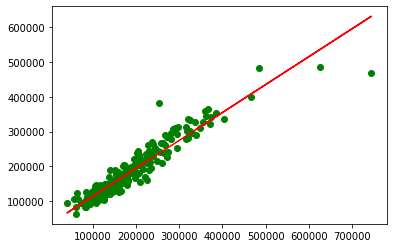

In [49]:
# Random Forest Plot for the test dataset.
plt.scatter(Y_test, preds_rf, color = 'green')

m, b = np.polyfit(Y_test, preds_rf, 1)

#use red as color for regression line
plt.plot(Y_test, m*Y_test+b, color='red')

**As seen above, majority of the data points are much closer to the regression line than as outliers. Hence, for the Random Forest Regressor model the score obtained is 89% and MAE is 16343.10**

# Gradient Boosting Regressor Model

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=500,random_state=0);
gbm_model.fit(X_train, Y_train)
preds_gbm = gbm_model.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(Y_test, preds_gbm))
print("Gradient Boosting Regressor Model Score for test dataset: ",gbm_model.score(X_test, Y_test))

Mean Absolute Error:  14460.846241252784
Gradient Boosting Regressor Model Score for test dataset:  0.9162507340948984


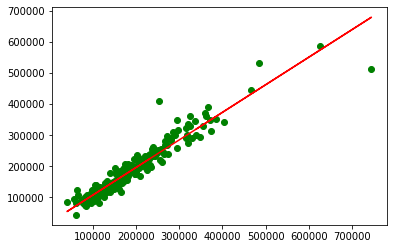

In [51]:
# Gradient Boost Plot for the test dataset.
plt.scatter(Y_test, preds_gbm, color = 'green')

m, b = np.polyfit(Y_test, preds_gbm, 1)

#use red as color for regression line
plt.plot(Y_test, m*Y_test+b, color='red')

**As seen above, majority of the data points are much closer to the regression line than as outliers. Hence, for the Gradient Boost Regressor model the score obtained is 91.6% and MAE is 14460.84**

# Combining all 4 models

In [52]:
#combining all the 4 models and checking the MAE
final_pred = (preds_gbm + preds_rf + pred_test_lasso + Y_test_price)/4;
print(mean_absolute_error(Y_test, final_pred))

15390.834660615585


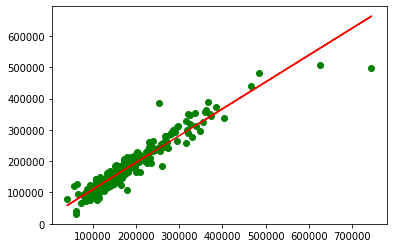

In [53]:
# Combined model Plot for the test dataset.
plt.scatter(Y_test, final_pred, color = 'green')

m, b = np.polyfit(Y_test, final_pred, 1)

#use red as color for regression line
plt.plot(Y_test, m*Y_test+b, color='red')